In [27]:
#1. Load Dataset
#2. Calculate Descriptive Stat -----> Mean, Median, q1, q2, q3, IQR, Whisker, Min, Max
#3. BoxPlot for every column, Histogram for every column.
#4. Counting or Calculating mode for categorical data(car name) and numerical data (origin, cylinders)
#5. Draw the histogram
#6. Scatter plot for every two columns

In [28]:
#1. Loading the Dataset
import pandas as pd
import numpy as np
dataset=pd.read_csv("auto-mpg.csv")
#Dimensions of the data
print(dataset.shape)
#Let's remove the eclipses and display all the data.
pd.set_option("Display.max_rows", 398)
pd.set_option("Display.max_columns", 9)

(398, 9)


In [29]:
#Information about our taken data -----> Structure of the dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [30]:
#2. Descriptive Statistics
def descriptive_stat(dataset):
  global Mean, Median, Min, Max, q1, q2, q3, iqr, upper_whisker, lower_whisker
  #we are not using the below syntax because select_dtypes is only used for type(DataFrame) not for Series
  #So if the dataset is of series then let's convert it into DataFrame.
  dataset=pd.DataFrame(dataset)
  dataset=dataset.select_dtypes(exclude=['object'])
  for column in dataset:
    print(f"Applying Descriptive Statistics for - [{column}]")
    subset=dataset[column]
    #1. Mean
    Mean=subset.mean()
    print("Mean - ", Mean)
    Median=subset.median()
    #print("\n================================")
    print("Median - ", Median)
    Min=subset.min()
    #print("\n================================")
    print("Minimum value - ", Min)
    Max=subset.max()
    #print("\n================================")
    print("Maximum value - ", Max)
    q1=subset.quantile(0.25)
    q2=subset.quantile(0.50)
    q3=subset.quantile(0.75)
    iqr=q3-q1
    #print("\n================================\n")
    print("Quartiles - ")
    print("Q1 = ", q1)
    #print("\n================================\n")
    print("Q2 = ", q2)
    #print("\n================================\n")
    print("Q3 = ", q3)
    #print("\n================================\n")
    print("IQR = ", iqr)
    upper_whisker=q3+(iqr*1.5)
    lower_whisker=q1-(iqr*1.5)
    #print("\n================================\n")
    print("Upper Whisker = ", upper_whisker, "Lower Whisker = ", lower_whisker)
    print("\n================================\n")
descriptive_stat(dataset)

Applying Descriptive Statistics for - [mpg]
Mean -  23.514572864321607
Median -  23.0
Minimum value -  9.0
Maximum value -  46.6
Quartiles - 
Q1 =  17.5
Q2 =  23.0
Q3 =  29.0
IQR =  11.5
Upper Whisker =  46.25 Lower Whisker =  0.25


Applying Descriptive Statistics for - [cylinders]
Mean -  5.454773869346734
Median -  4.0
Minimum value -  3
Maximum value -  8
Quartiles - 
Q1 =  4.0
Q2 =  4.0
Q3 =  8.0
IQR =  4.0
Upper Whisker =  14.0 Lower Whisker =  -2.0


Applying Descriptive Statistics for - [displacement]
Mean -  193.42587939698493
Median -  148.5
Minimum value -  68.0
Maximum value -  455.0
Quartiles - 
Q1 =  104.25
Q2 =  148.5
Q3 =  262.0
IQR =  157.75
Upper Whisker =  498.625 Lower Whisker =  -132.375


Applying Descriptive Statistics for - [weight]
Mean -  2970.424623115578
Median -  2803.5
Minimum value -  1613
Maximum value -  5140
Quartiles - 
Q1 =  2223.75
Q2 =  2803.5
Q3 =  3608.0
IQR =  1384.25
Upper Whisker =  5684.375 Lower Whisker =  147.375


Applying Descriptive Stat

In [31]:
'''
Above we can clearly see that in our taken dataframe there are two columns of dtype -----> object

Let's subset the Horsepower column and look into it if there are any null values that's why it is showing horsepower as
object. or the numerical values are in the type of string.
'''
#Let's Subset the data first.
HorsePower=dataset['horsepower']
HorsePower.head()

0    130
1    165
2    150
3    150
4    140
Name: horsepower, dtype: object

In [32]:
HorsePower.info()
#No values we wil get because we excluded object dtype data. even though we didn't exclude we will get an error
#because of the dtype object.
descriptive_stat(HorsePower)

<class 'pandas.core.series.Series'>
RangeIndex: 398 entries, 0 to 397
Series name: horsepower
Non-Null Count  Dtype 
--------------  ----- 
398 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


In [33]:
#We can see that Horsepower is of numeric data but why it is showing that it's dtype as object.
#So we can't able to calculate descriptive Statistics due to it's dtype.
#Let's check any null values prented in our data or not.
print(HorsePower.isnull())
#Above it's very hard to look clearly if any of the values are of True or not if they are very less.
#So, Let's Subset the null values data.
print("=================================")
null_values=HorsePower[HorsePower.isna()]
null_values.head()
#Null values also not present in our data.

0      False
1      False
2      False
3      False
4      False
5      False
6      False
7      False
8      False
9      False
10     False
11     False
12     False
13     False
14     False
15     False
16     False
17     False
18     False
19     False
20     False
21     False
22     False
23     False
24     False
25     False
26     False
27     False
28     False
29     False
30     False
31     False
32     False
33     False
34     False
35     False
36     False
37     False
38     False
39     False
40     False
41     False
42     False
43     False
44     False
45     False
46     False
47     False
48     False
49     False
50     False
51     False
52     False
53     False
54     False
55     False
56     False
57     False
58     False
59     False
60     False
61     False
62     False
63     False
64     False
65     False
66     False
67     False
68     False
69     False
70     False
71     False
72     False
73     False
74     False
75     False
76     False

Series([], Name: horsepower, dtype: object)

In [34]:
#Hence we can see that HorsePower is of numerical data but unfortunately we got the dtype of object due to String Values.
#String values are '?' in our data.
#So, now we can Replace string values with numeric values indirectly in so many ways.
print(HorsePower.shape)
#converting to numeric type hence wherever the strings were present they were changed to NaN values
HorsePower=pd.to_numeric(HorsePower, errors='coerce')
print(HorsePower.shape)
HorsePower.head()

(398,)
(398,)


0    130.0
1    165.0
2    150.0
3    150.0
4    140.0
Name: horsepower, dtype: float64

In [35]:
#Subsetting Null values
null_values=HorsePower[HorsePower.isna()]
null_values

32    NaN
126   NaN
330   NaN
336   NaN
354   NaN
374   NaN
Name: horsepower, dtype: float64

In [36]:
#Even though there are null values we can apply statistical methods but we only can't apply if there are any string type.
#Now let's calculate the descriptive statistics and replace the null values with Mean or Median.
descriptive_stat(HorsePower)

Applying Descriptive Statistics for - [horsepower]
Mean -  104.46938775510205
Median -  93.5
Minimum value -  46.0
Maximum value -  230.0
Quartiles - 
Q1 =  75.0
Q2 =  93.5
Q3 =  126.0
IQR =  51.0
Upper Whisker =  202.5 Lower Whisker =  -1.5




In [37]:
#Replacing null values with Mean
HorsePower.fillna(value=Mean, inplace=True)
print(HorsePower)
print("=====================================")
dataset['horsepower']=HorsePower
print(dataset.info())
print("=====================================")
#Applying Descriptive statistical methods on HorsePower after replacing null values
descriptive_stat(HorsePower)

0      130.000000
1      165.000000
2      150.000000
3      150.000000
4      140.000000
5      198.000000
6      220.000000
7      215.000000
8      225.000000
9      190.000000
10     170.000000
11     160.000000
12     150.000000
13     225.000000
14      95.000000
15      95.000000
16      97.000000
17      85.000000
18      88.000000
19      46.000000
20      87.000000
21      90.000000
22      95.000000
23     113.000000
24      90.000000
25     215.000000
26     200.000000
27     210.000000
28     193.000000
29      88.000000
30      90.000000
31      95.000000
32     104.469388
33     100.000000
34     105.000000
35     100.000000
36      88.000000
37     100.000000
38     165.000000
39     175.000000
40     153.000000
41     150.000000
42     180.000000
43     170.000000
44     175.000000
45     110.000000
46      72.000000
47     100.000000
48      88.000000
49      86.000000
50      90.000000
51      70.000000
52      76.000000
53      65.000000
54      69.000000
55      60

In [38]:
#Subsetting numeric dtype columns for visualisation, because we can't apply visualisation for some methods to strings data.
numeric_columns=dataset.iloc[:, 0:8]
print(numeric_columns.shape)
numeric_columns.head()

(398, 8)


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130.0,3504,12.0,70,1
1,15.0,8,350.0,165.0,3693,11.5,70,1
2,18.0,8,318.0,150.0,3436,11.0,70,1
3,16.0,8,304.0,150.0,3433,12.0,70,1
4,17.0,8,302.0,140.0,3449,10.5,70,1


<Axes: >

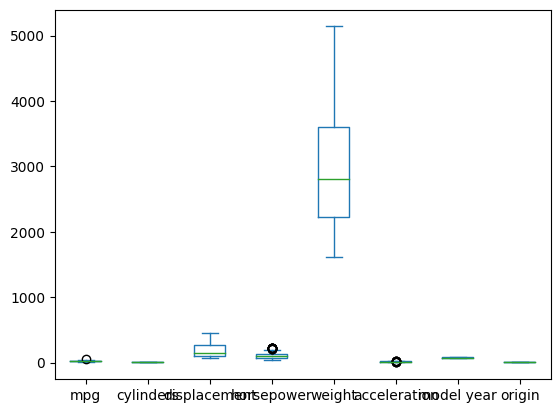

In [39]:
#3. BoxPlot for every column, Histogram for every column.
#BoxPlot for each column
dataset.plot.box()

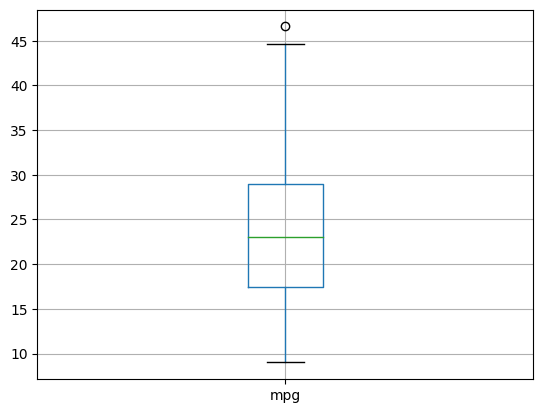

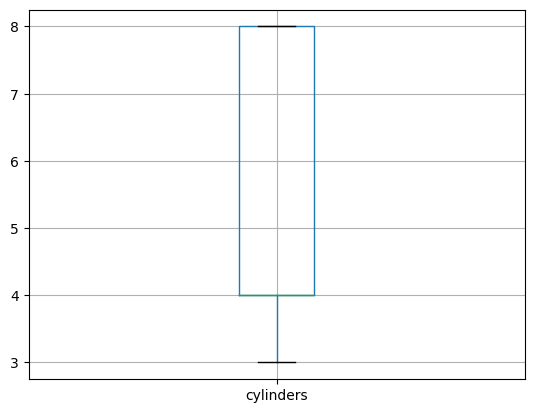

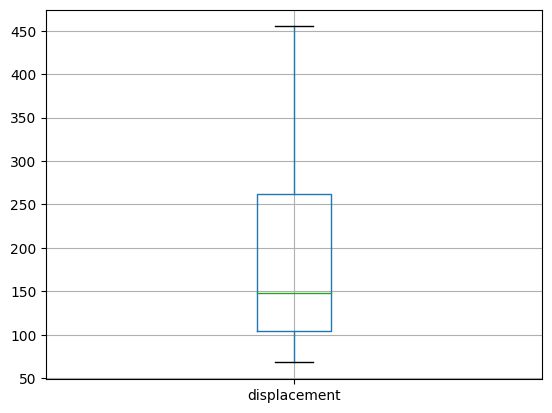

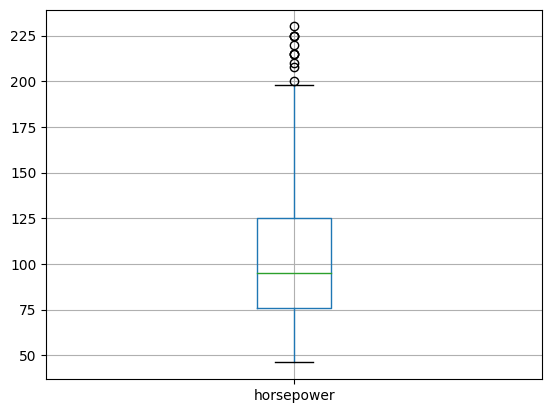

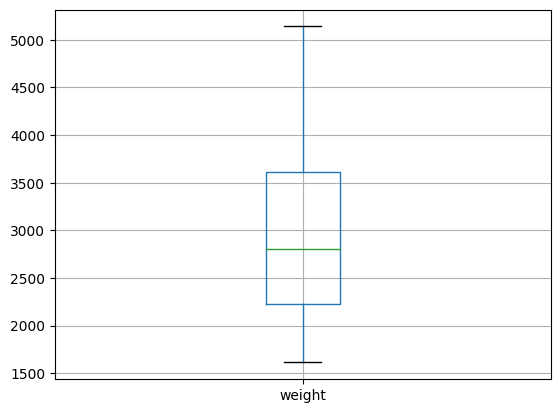

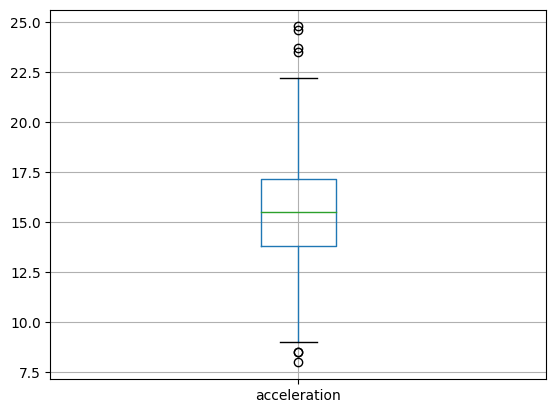

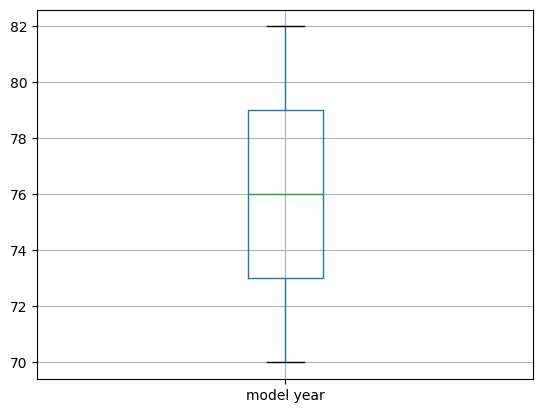

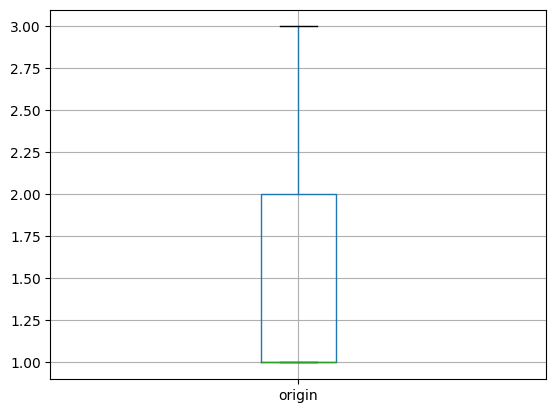

In [40]:
from matplotlib import pyplot as plt
#Clearly generating a figure of box plot to each of the column
for column in numeric_columns:
  plt.figure()
  numeric_columns.boxplot([column])

<Axes: ylabel='Frequency'>

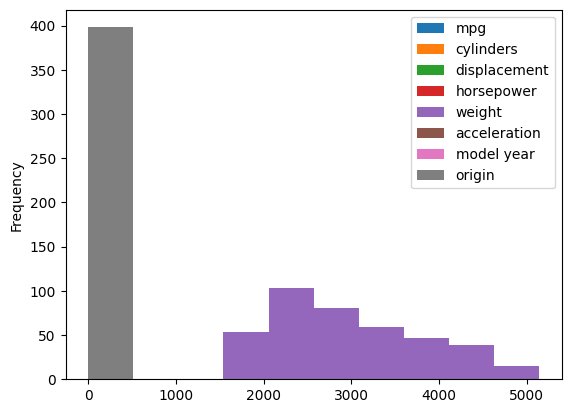

In [41]:
#Histogram for all the columns
numeric_columns.plot.hist()

In [42]:
#4. Counting or Calculating mode for categorical data(car name) and numerical data (origin, cylinders)
#i. Categorical data
Car_name=dataset['car name']
Car_counts=Car_name.value_counts()
print("Frequency counts of each unique Car = \n", Car_counts)
#Mode for Car_name
print("=====================================")
print("Highest Frequency = ", Car_name.mode())

Frequency counts of each unique Car = 
 ford pinto                              6
toyota corolla                          5
amc matador                             5
ford maverick                           5
chevrolet chevette                      4
amc gremlin                             4
chevrolet impala                        4
peugeot 504                             4
amc hornet                              4
toyota corona                           4
ford gran torino                        3
chevrolet caprice classic               3
honda civic                             3
volkswagen dasher                       3
dodge colt                              3
chevrolet citation                      3
chevrolet nova                          3
pontiac catalina                        3
plymouth fury iii                       3
ford galaxie 500                        3
chevrolet vega                          3
plymouth duster                         3
amc matador (sw)                    

<Axes: >

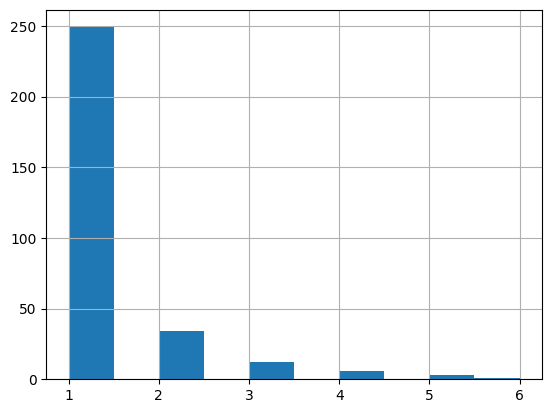

In [43]:
#5. Histogram for categorical data.
Car_counts.hist()

In [44]:
#Removing Outliers in the data.
print(numeric_columns.shape)
for column in numeric_columns:
  descriptive_stat(numeric_columns[column])
  j=0
  for value in numeric_columns[column]:
    if value > upper_whisker or value < lower_whisker:
      print(value)
      print(j)
      numeric_columns.drop(j, inplace=True)
    j+=1
  numeric_columns.reset_index(inplace=True, drop=True)
numeric_columns.head()

(398, 8)
Applying Descriptive Statistics for - [mpg]
Mean -  23.514572864321607
Median -  23.0
Minimum value -  9.0
Maximum value -  46.6
Quartiles - 
Q1 =  17.5
Q2 =  23.0
Q3 =  29.0
IQR =  11.5
Upper Whisker =  46.25 Lower Whisker =  0.25


46.6
322
Applying Descriptive Statistics for - [cylinders]
Mean -  5.458438287153652
Median -  4.0
Minimum value -  3
Maximum value -  8
Quartiles - 
Q1 =  4.0
Q2 =  4.0
Q3 =  8.0
IQR =  4.0
Upper Whisker =  14.0 Lower Whisker =  -2.0


Applying Descriptive Statistics for - [displacement]
Mean -  193.69647355163727
Median -  151.0
Minimum value -  68.0
Maximum value -  455.0
Quartiles - 
Q1 =  105.0
Q2 =  151.0
Q3 =  262.0
IQR =  157.0
Upper Whisker =  497.5 Lower Whisker =  -130.5


Applying Descriptive Statistics for - [horsepower]
Mean -  104.56880686783528
Median -  95.0
Minimum value -  46.0
Maximum value -  230.0
Quartiles - 
Q1 =  76.0
Q2 =  95.0
Q3 =  125.0
IQR =  49.0
Upper Whisker =  198.5 Lower Whisker =  2.5


220.0
6
215.0
7
225.0
8
2

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130.0,3504,12.0,70,1
1,15.0,8,350.0,165.0,3693,11.5,70,1
2,18.0,8,318.0,150.0,3436,11.0,70,1
3,16.0,8,304.0,150.0,3433,12.0,70,1
4,17.0,8,302.0,140.0,3449,10.5,70,1


In [45]:
print(numeric_columns.shape)
print(dataset.shape)
j=322
dataset.drop(j).head()

(378, 8)
(398, 9)


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


(378, 8)
20
Figure(1000x1500)


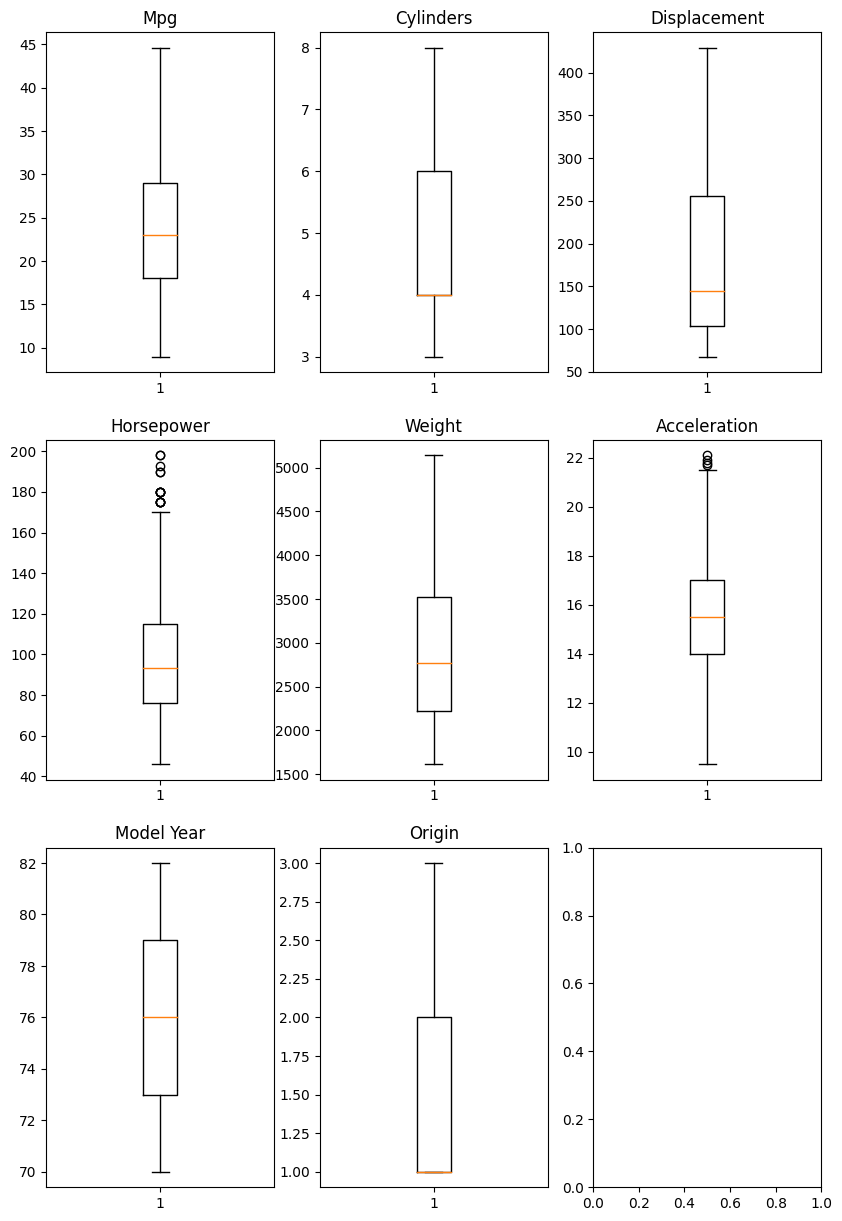

In [46]:
#Visualising after removing outliers to re-check whether they are removed or not and if any other values
#should removed or not.
print(numeric_columns.shape)
original_dataset=dataset.shape
cleaned_dataset=numeric_columns.shape
deleted_dataset=original_dataset[0]-cleaned_dataset[0]
print(deleted_dataset)
#After deleting 51 rows from the original dataset we got complete cleaned dataset without outliers in our data.
fig, axes=plt.subplots(nrows=3, ncols=3, figsize=(10, 15))
print(fig)
k=0
cols=numeric_columns.columns
for i in range(len(axes)):
  for j in range(len(axes)):
    if k==len(cols):
      break
    column=cols[k]
    axes[i][j].boxplot(numeric_columns[column])
    axes[i][j].set_title(column.title())
    k+=1
fig.show()